# Unsupervised learning HANDS ON!

Here an example on how to generate data in classes, and work on the data directly via their classes. 

#### Let's get back the class from the previous example

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y]
        
        return self.data

    def plot_me(self):
        plt.scatter(self.data[0], self.data[1])
        
    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self.data
        
    def __str__(self):
        return f'Class {self.description} for 2D data' 

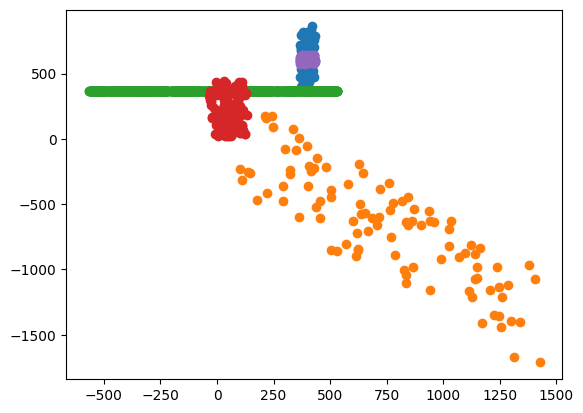

In [2]:
## And let's plot it for a random dataset
data_settings = [{'n_points':  100, 'x_range': [ 366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points': 1000, 'x_range': [-566,  533], 'y_range': [ 366,  366], 'true_slope':  0, 'true_intercept':  0},
                 {'n_points':  100, 'x_range': [ -36,  133], 'y_range': [   6,  433], 'true_slope':  0, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [ 366,  433], 'y_range': [ 566,  633], 'true_slope':  0, 'true_intercept': 10}]
 
my_classes = []
for i in range(len(data_settings)):
    my_classes.append(Data_generator(data_settings=data_settings[i]))
    
for i, i_class in enumerate(my_classes): 
    i_class.generate_data()
    i_class.plot_me()

### K-Means Clustering & Gaussian Mixture Modeling

/home/enrico/miniconda3/envs/various/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


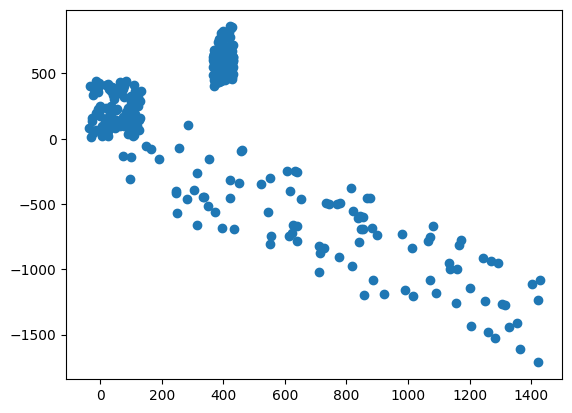

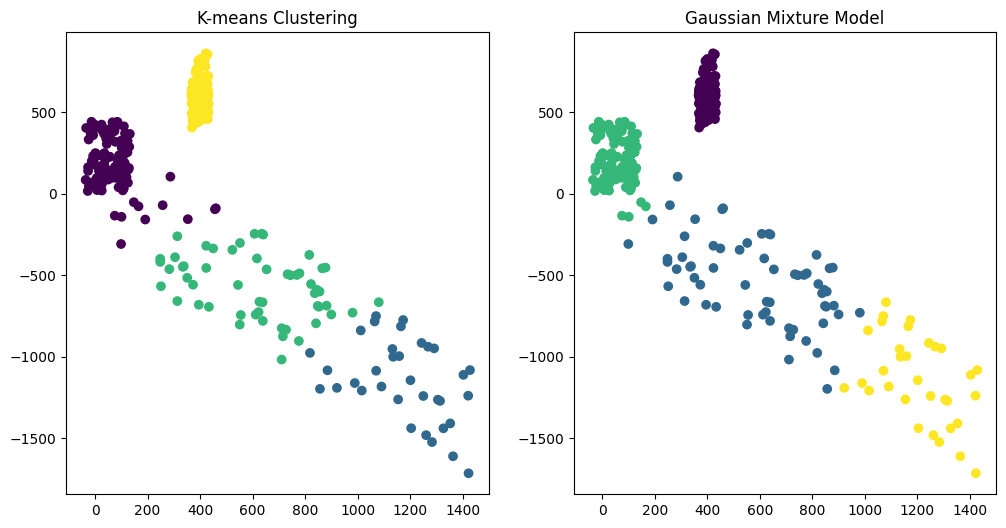

In [212]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

my_main_class = my_classes[0]
for i in range(1, len(my_classes)):    
    my_main_class + my_classes[i] 
my_main_class.plot_me()

x = my_main_class.data[0]
y = my_main_class.data[1]
data = np.vstack((x, y)).T  # Combine x and y into a single data array suitable for clustering

# Apply K-means clustering
kmeans = KMeans(n_clusters=4) 
kmeans.fit(data)
labels_kmeans = kmeans.labels_

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(data)
labels_gmm = gmm.predict(data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.title('K-means Clustering')
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_gmm)
plt.title('Gaussian Mixture Model')
plt.show()

###